<a href="https://colab.research.google.com/github/pranay823/oops/blob/main/Exception_Handling_c%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exception Handling

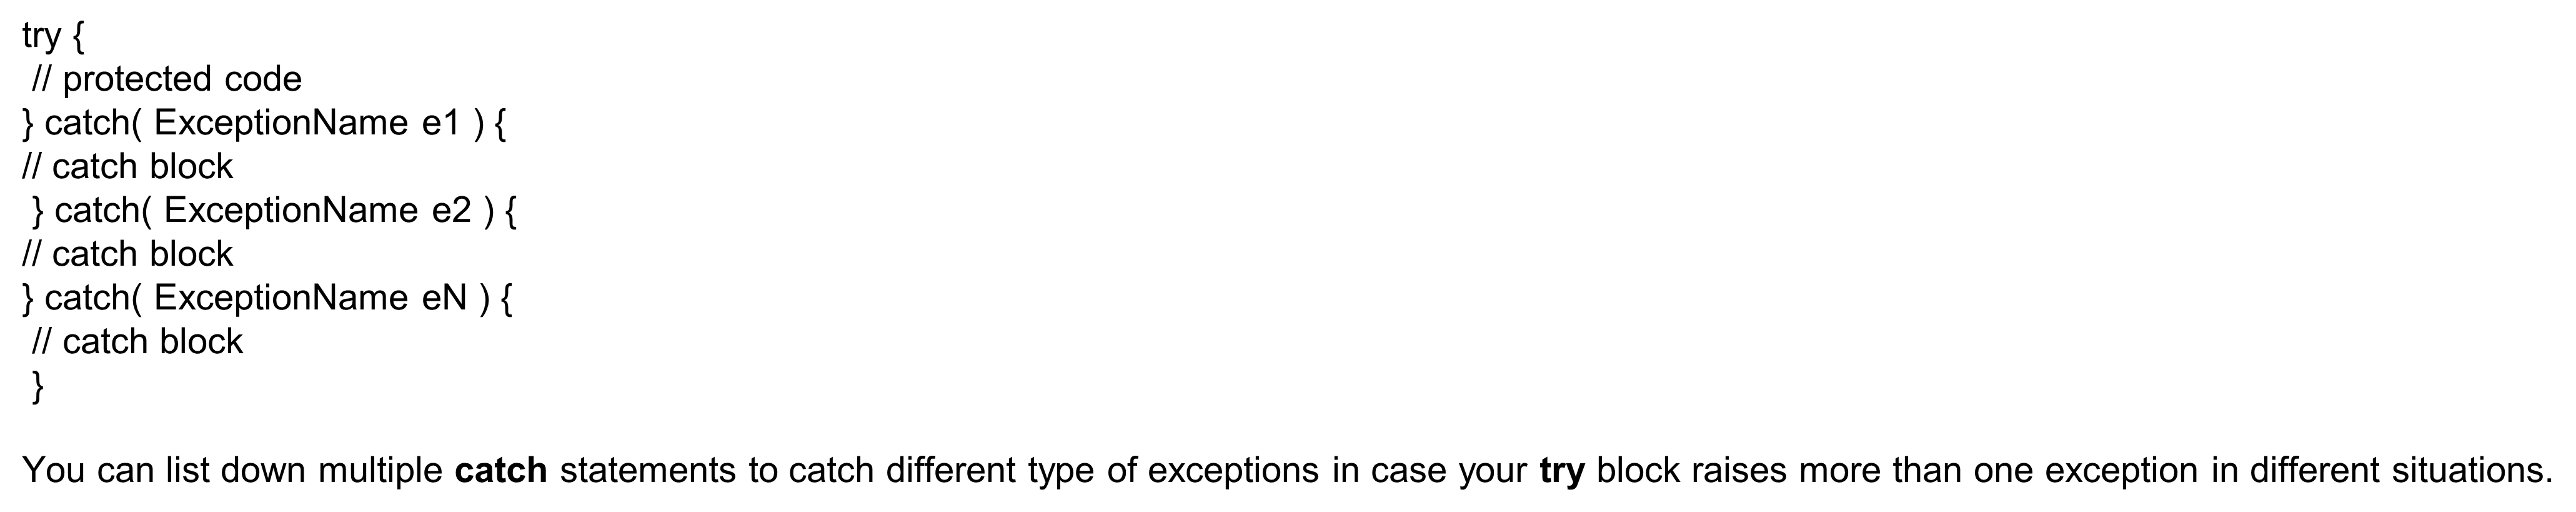

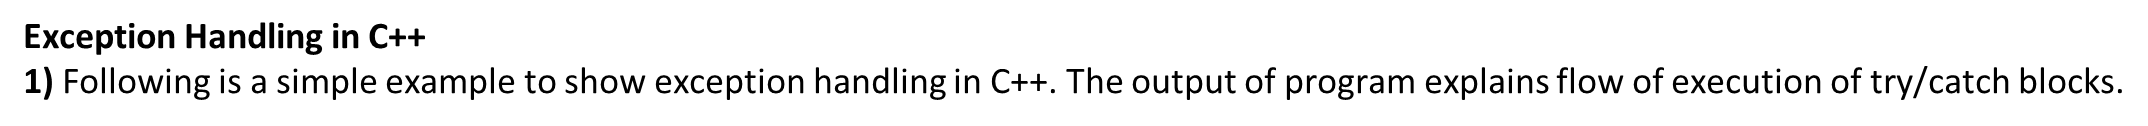

In [ ]:
%%writefile first.cpp
#include <iostream>
using namespace std;
int main()
{
int x = -1;
// Some code
cout << "Before try \n";
try {
	cout << "Inside try \n";
	if (x < 0)
	{
		throw x;
		cout << "After throw (Never executed) \n";
	}
}
catch (int x ) {
	cout << "Exception Caught \n";
}
cout << "After catch (Will be executed) \n";
return 0;
}



Overwriting first.cpp


In [ ]:
!g++ first.cpp -o first
! ./first

Before try 
Inside try 
Exception Caught 
After catch (Will be executed) 


2) There is a special catch block called ‘catch all’ catch(…) that can be used to catch all types of exceptions. For example, in the following program, an int is thrown as an exception, but there is no catch block for int, so catch(…) block will be executed. 

In [ ]:
%%writefile second.cpp
#include <iostream>
using namespace std;
int main()
{
	try {
	throw 10;
	}
	catch (char *excp) {
		cout << "Caught " << excp;
	}
	catch (...) {
		cout << "Default Exception\n";
	}
	return 0;
}



Writing second.cpp


3) Implicit type conversion doesn’t happen for primitive types. For example, in the following program ‘a’ is not implicitly converted to int 

In [ ]:
%%writefile third.cpp
#include <iostream>
using namespace std;
int main()
{
	try {
	throw 'a';
	}
	catch (int x) {
		cout << "Caught " << x;
	}
	
	return 0;
}


Overwriting third.cpp


In [ ]:
!g++ third.cpp -o third
! ./third

terminate called after throwing an instance of 'char'


4) If an exception is thrown and not caught anywhere, the program terminates abnormally. For example, in the following program, a char is thrown, but there is no catch block to catch a char. 

In [ ]:
%%writefile fourth.cpp
#include <iostream>
using namespace std;
int main()
{
	try {
	throw 'a';
	}
	catch (int x) {
		cout << "Caught ";
	}
	return 0;
}


Writing fourth.cpp


In [ ]:
!g++ fourth.cpp -o fourth
! ./fourth

terminate called after throwing an instance of 'char'


In [ ]:
%%writefile fifth.cpp
#include <iostream>
using namespace std;
// This function signature is fine by the compiler, but not recommended.
// Ideally, the function should specify all uncaught exceptions and function
// signature should be "void fun(int *ptr, int x) throw (int *, int)"
void fun(int *ptr, int x)
{
	if (ptr == NULL)
		throw ptr;
	if (x == 0)
		throw x;
	/* Some functionality */
}
int main()
{
	try {
	fun(NULL, 0);
	}
	catch(...) {
		cout << "Caught exception from fun()";
	}
	return 0;
}


Writing fifth.cpp


In [ ]:
!g++ fifth.cpp -o fifth
! ./fifth

Caught exception from fun()

In [ ]:
# A better way to write above code 
%%writefile fifth.cpp
#include <iostream>
using namespace std;
// Here we specify the exceptions that this function 
// throws.
void fun(int *ptr, int x) throw (int *, int)
{
	if (ptr == NULL)
		throw ptr;
	if (x == 0)
		throw x;
	/* Some functionality */
}
int main()
{
	try {
	fun(NULL, 0);
	}
	catch(...) {
		cout << "Caught exception from fun()";
	}
	return 0;
}



Overwriting fifth.cpp


In [ ]:
!g++ fifth.cpp -o fifth
! ./fifth

fifth.cpp:5:27: warning: dynamic exception specifications are deprecated in C++11 [-Wdeprecated]
 void fun(int *ptr, int x) throw (int *, int)
                           ^~~~~
Caught exception from fun()

In C++, try-catch blocks can be nested. Also, an exception can be re-thrown using “throw; ” 

In [ ]:
%%writefile sixth.cpp
#include <iostream>
using namespace std;
int main()
{
	try {
		try {
			throw 20;
		}
		catch (int n) {
			cout << "Handle Partially"<<endl ;
			throw; // Re-throwing an exception
		}
	}
	catch (int n) {
		cout << "Handle remaining" <<endl;
	}
}

Overwriting sixth.cpp


In [ ]:
!g++ sixth.cpp -o sixth
! ./sixth

Handle Partially
Handle remaining


When an exception is thrown, all objects created inside the enclosing try block are destructed before the control is transferred to catch block

In [ ]:
%%writefile seventh.cpp
#include <iostream>
using namespace std;
class Test {
public:
	Test() { cout << "Constructor of Test " << endl; }
	~Test() { cout << "Destructor of Test " << endl; }
};
int main()
{
	try {
		Test t1;
		throw 10;
	}
	catch (int i) {
		cout << "Caught " << i << endl;
	}
}



Writing seventh.cpp


In [ ]:
!g++ seventh.cpp -o seventh
! ./seventh

Constructor of Test 
Destructor of Test 
Caught 10


In [ ]:
%%writefile eighth.cpp
#include <iostream>
using namespace std;
class ex1
{
    public:
double division(int a, int b) 
{
   if( b == 0 ) 
	{ 
	          throw b;  
                  }   
    return (a/b);
}
};
int main () {  
 int x = 50;  
 int y =0;  
double z = 0;  
try 
{   
    ex1 o1; 
     z = o1.division(x, y); 
     cout << z << endl;  
 } catch (int x1) 
   {     cout << "division by zero"<<   x1 << endl;   }
   return 0;
  }


Overwriting eighth.cpp


In [ ]:
!g++ eighth.cpp -o eighth
! ./eighth

division by zero0


In [ ]:
%%writefile ninth.cpp
#include <iostream>
using namespace std;
class even { 
    public:
    even()
    {
        cout<<"even no exception"<<endl;
    }
    
}; 
  
int main() 
{ 
    int i;
    try { 
        cin>>i;
        if (i%2==0)
        throw even();
        else
        cout<<i;
    } 
catch (even d) { 
        cout << "Caught exception of demo class \n"<<endl; 
    } 
}



Overwriting ninth.cpp


In [ ]:
!g++ ninth.cpp -o ninth
! ./ninth

12
even no exception
Caught exception of demo class 

